In [1]:
import numpy as np 
import matplotlib.pyplot as plt
import cv2

## Implementation of Conv1D

In [25]:
def conv1D(input1, input2, mode='full'):
    """
    input1 : (N,) array-like
              First dimensional input array
    input2 : (M,) array-like
              Second dimensional input array
    mode : {full, same, valid}
    out : Discrete linear of convolution of input1 and input2
    
    consider N >= M
    consider M an odd number
    """
    
    # implement your code here
    n = input1.shape[0]
    m = input2.shape[0]
    
    
    signal = np.zeros(n + 2*(m-1))
    signal[m-1:-m+1] = input1
    kernel = input2[::-1]
    
    general_result = np.zeros(n+m-1)
    
    for i in range(n + m -1):
        general_result[i] = np.sum(signal[i:i+m]*kernel)
    
    if mode == 'full':
        out = general_result
    elif mode == 'same':
        out = general_result[(m-1)//2:(-m+1)//2]
    elif mode == 'valid':
        out = general_result[m-1:-m+1]


    return out

In [26]:
# test
# do not change this cell
input1 = np.array([7,8,5,9,4,3,2,6,8,10])
input2 = np.array([-1,0,2,3,-1])

np_full = np.convolve(input1,input2,mode='full')
assert (np_full == conv1D(input1,input2, mode= 'full')).all()

np_same = np.convolve(input1,input2,mode='same')
assert (np_same == conv1D(input1,input2, mode= 'same')).all()

np_valid = np.convolve(input1,input2,mode='valid')
assert (np_valid == conv1D(input1,input2, mode= 'valid')).all()

## Implementation of conv2D

In [62]:
def conv2D(input1, input2):
    """
    input1 : (M,N) array-like
              First dimensional input array
    input2 : (a,b) array-like
              Second dimensional input array
    out : (M-a+1,N-b+1) array-like
              Convolution of input1 and input2 with valid padding
              
    consider M >= a and N >= b
    consider a and b odds number
    """

    # implement your code here
    M, N = input1.shape
    a, b = input2.shape
    
    kernel = input2[::-1,::-1]
    out = np.zeros((M -a +1,N -b +1))
    
    for i in range(M -a +1):
        for j in range(N -b +1):
            out[i,j] = np.sum(input1[i:i+a,j:j+b]*kernel) 

    return out

(165, 216)


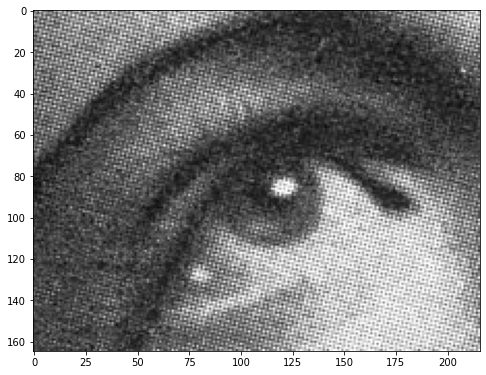

In [63]:
I = cv2.imread('eye.png')
I = cv2.cvtColor(I,cv2.COLOR_BGR2GRAY)
fig = plt.figure(figsize=(8, 8))
plt.imshow(I,cmap='gray')
print(I.shape)

In [64]:
# no need to understand this part
kernel = cv2.getGaussianKernel(5,5)
kernel = kernel.dot(kernel.T)
print(kernel)

[[0.03688345 0.03916419 0.03995536 0.03916419 0.03688345]
 [0.03916419 0.04158597 0.04242606 0.04158597 0.03916419]
 [0.03995536 0.04242606 0.04328312 0.04242606 0.03995536]
 [0.03916419 0.04158597 0.04242606 0.04158597 0.03916419]
 [0.03688345 0.03916419 0.03995536 0.03916419 0.03688345]]


Text(0.5, 1.0, 'Expected Result')

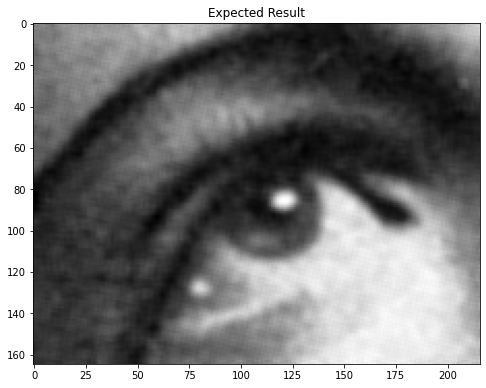

In [89]:
# expected result
fig = plt.figure(figsize=(8, 8))
plt.imshow(cv2.filter2D(I,-1,kernel),cmap='gray')
plt.title('Expected Result')

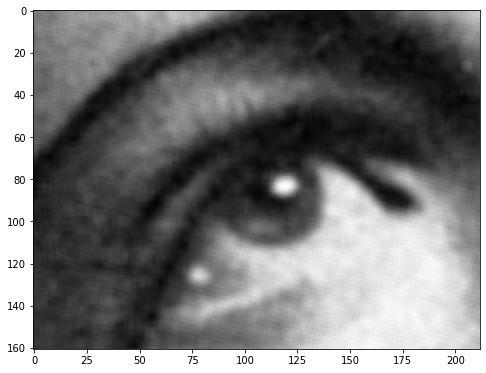

In [85]:
# test
# do not change this cell
result = conv2D(I,kernel)
fig = plt.figure(figsize=(8, 8))
plt.imshow(result,cmap='gray')